# will wright from right to left in Hebrew like the text cell blow

video link : https://drive.google.com/file/d/152qNMLhA0HUjbW42IjyVthRXSblPCiuM/view?usp=sharing

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
ממן 13 - פז כהן
</div>
<div dir="rtl">
יבוא של סיפריות ופונקצית בדיקה שהקלטים לפונקציות בשאלות הבאות תקינות
</div>

In [1]:
import math
import torch
import pandas as pd
from torch.utils.data import Dataset
from torch import nn
import torchvision
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tqdm import tqdm

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיפים א-ד
</div>
<div dir="rtl">
 יבוא וטיפול של הדאטא: </br>
    1.מיון השורות לפי ערך 'Y'<br>
    2.יצירת עמודת עשיריות<br>
    3.הוספת עמודת העשיריות כ 'class'<br>
    4.הדפסה לבדיקה
</div>

In [2]:
dataset = pd.read_csv('diabetes.csv', delimiter='\t')
dataset = dataset.sort_values(by=['Y'], ascending=True)
dataset = dataset.reset_index(drop=True)

In [3]:
ten = 10
decile = pd.qcut(dataset['Y'], q=[i / ten for i in range (ten+1)],labels=[i+1 for i in range(ten)])
dataset['class'] = decile

In [4]:
print(dataset.to_string())

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y class
0     44    1  25.4   95.00  162   92.6  53.0  3.00  4.4067   83   25     1
1     49    1  25.6   76.00  161   99.8  51.0  3.00  3.9318   78   31     1
2     41    1  20.5   80.00  124   48.8  64.0  2.00  4.0254   75   37     1
3     39    2  21.2   90.00  182  110.4  60.0  3.00  4.0604   98   39     1
4     60    1  25.6   78.00  195   95.4  91.0  2.00  3.7612   87   39     1
5     48    1  22.8  101.00  110   41.6  56.0  2.00  4.1271   97   40     1
6     34    2  22.6   75.00  166   91.8  60.0  3.00  4.2627  108   42     1
7     46    2  23.5   87.00  181  114.8  44.0  4.00  4.7095   98   42     1
8     43    1  21.3   79.00  141   78.8  53.0  3.00  3.8286   90   42     1
9     25    2  23.5   88.00  143   80.8  55.0  3.00  3.5835   83   43     1
10    51    2  26.2  101.00  161   99.6  48.0  3.00  4.2047   88   44     1
11    34    2  20.6   98.00  183   92.0  83.0  2.00  3.6889   92   45     1
12    55    

<div dir="rtl">
ניתן לראות שהתקבל דאטא המחולק לעשירונים לפי ערכי  'Y' </br>
</div>

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף ה-ז
</div>
<div dir="rtl">
יצירת מחלקת DataLoader היורששת ממחלקת Dataset ובעלת המתודות הדרוות ומתודות נוספות
</div>

In [5]:
'''
DatLoader class that lod the dataset into an objct that more is more compatible with batches.

Methods :
    
    __init__ :  initialize the DataLoader object.
    Input :
        > 'dataset' - Tensore of the batch features.
        > 'minibatches' - Tensore of the batch labels.
        
    __len__ : calculate the number of Row's in the dataset
    Return : the length of the dataset
    
    __getitem__ :
    Input :
        > 'idx' -  the index of the row of the item to get
    Return : the item in the dataset with index idx
    
    getBatch : get a batch from the dataset that correspond to index,
               with 'minibatches' row's
    Input :
        > 'idx' -  the index of the batch within the dataaset to get
    Return : tensor with the batch data that corespond to index idx
             if idx out of bound return None
'''
class DataLoader(Dataset):

    def __init__(self, dataset, minibatches = 1):
        #call for Dataset constractor.
        super().__init__()
        
        self.dataset = torch.tensor(dataset.values)
        
        self.minibatches = minibatches
        self.batchq = math.ceil(len(self.dataset)/self.minibatches)
              
    def __len__(self):
        return len(self.dataset)
    
  
    def __getitem__(self, idx):
        return self.dataset[idx]
      
    def getBatch(self,idx):
        #calculate the starting row of the batch
        start_idx = idx * self.minibatches
        
        #return None if the idx is out of bound
        if start_idx >= len(self.dataset):
            return None
        
        #calculate the ending row of the batch 
        #(if the data is not divid-able then the last batch will have the remainder)
        end_idx = min((idx + 1) * self.minibatches, len(self.dataset))
        
        #create the batch from the starting row to the finish row
        batch = self.dataset[start_idx: end_idx]
        
        return batch        

<div dir="rtl">
בדיקת המתודות : __len__, __getitem__
</div>

In [6]:
ds = DataLoader(dataset, 10)
print(ds.__len__())
print(ds.__getitem__(0))

442
tensor([ 44.0000,   1.0000,  25.4000,  95.0000, 162.0000,  92.6000,  53.0000,
          3.0000,   4.4067,  83.0000,  25.0000,   1.0000], dtype=torch.float64)


<div dir="rtl">
בדיקת המתודות : getBatch המחזירה bach יחיד
</div>

In [31]:
batch = ds.getBatch(0)
print(batch)

tensor([[ 44.0000,   1.0000,  25.4000,  95.0000, 162.0000,  92.6000,  53.0000,
           3.0000,   4.4067,  83.0000,  25.0000,   1.0000],
        [ 49.0000,   1.0000,  25.6000,  76.0000, 161.0000,  99.8000,  51.0000,
           3.0000,   3.9318,  78.0000,  31.0000,   1.0000],
        [ 41.0000,   1.0000,  20.5000,  80.0000, 124.0000,  48.8000,  64.0000,
           2.0000,   4.0254,  75.0000,  37.0000,   1.0000],
        [ 39.0000,   2.0000,  21.2000,  90.0000, 182.0000, 110.4000,  60.0000,
           3.0000,   4.0604,  98.0000,  39.0000,   1.0000],
        [ 60.0000,   1.0000,  25.6000,  78.0000, 195.0000,  95.4000,  91.0000,
           2.0000,   3.7612,  87.0000,  39.0000,   1.0000],
        [ 48.0000,   1.0000,  22.8000, 101.0000, 110.0000,  41.6000,  56.0000,
           2.0000,   4.1271,  97.0000,  40.0000,   1.0000],
        [ 34.0000,   2.0000,  22.6000,  75.0000, 166.0000,  91.8000,  60.0000,
           3.0000,   4.2627, 108.0000,  42.0000,   1.0000],
        [ 46.0000,   2.0000

<div dir="rtl">
יצירת פונציות שיעזרו לסעיפים הבאים : </br>
- iter_batch : עובר על batch יחיד ומודד את הביצועים של אותו ה batch <br>
- iter_epoch : עובר על כול ה batches בדאטא ומחזיר loss,accuracy ממוצע עבור אותו epoch אשר לאחר מיכך ניתן ללמד את הרששת בעזרתו <br>
- eval_model_test : מריץ את הרשת על testing set ובודק את תוצאת הרשת אליו בepoch הנוכחי <br>
- plot_result : מדפיס את התוצאה הסופית אבור ה loss, aaccuracy של סט האימון וסט הבדיקה, בנוסף מצייר גרף של השיפור בין epoch שונים. <br>
- run_nn : מריץ את המודל על הדאטה במספר ה epotches הרצוי ולבסוף מדפיס את תוצאות המודל.<br>
<br> אציין שכלל הפונקציות הללו נלקחו ממדריך הלמידה ו-github המצורף אליו ועברו שינויים מינורים.
</div>

In [8]:
#cradit to this course GitHub
'''
iter_batch : method that go through one btch and evaluate the loss and accuracy 
             of that batch.
Input :
    > 'features' - Tensore of the batch features.
    > 'labels' - Tensore of the batch labels.
    > 'CE_loss' - loss function.
    > optimizer - oprimizer function  to optimize with.
Return : the loss and the acc (accuracy) of said batch.
'''
def iter_batch(features, labels, model, CE_loss, optimizer):
    labels = labels.flatten().long()
    
    optimizer.zero_grad() # zeroing the gradient 
    y_model = model(features.to(model[0].weight.dtype)) # enter the features into the nn
    loss = CE_loss(y_model, labels) # calc the loss
    
    loss.backward() # calc the gradient 
    optimizer.step() 
    
    predicted_labels = y_model.argmax(dim=1)
    acc = (predicted_labels == labels).sum().float() / len(labels)
    return loss.detach(), acc.detach()

In [9]:
#cradit to this course GitHub
'''
iter_epoch : go through all the Batches in the data and calculate each batch loss and acc,
             sums up the total loss and acc to calculate the average of.
Input :
    > 'dl' -DataLoder object of the data.
    > 'model' - the Neuron network model.
    > 'CE_loss' - loss function.
    > 'optimizer' - oprimizer function  to optimize with.
Return : the average loss and acc (accuraacy) of all the Batchs.
'''
def iter_epoch(dl, model, CE_loss, optimizer) :
    #initialize variable
    running_loss = 0.
    running_acc = 0.
    idx = 0
    
    while idx < dl.batchq :
        #get the next batch and split into features, labels
        batch = dl.getBatch(idx)
        features, labels = batch[:,:-1], batch[:,-1:]
        
        #calc th btch loss and acc
        batch_loss, batch_acc = iter_batch(features, labels, model, CE_loss, optimizer)
        running_loss += batch_loss
        running_acc += batch_acc
        idx += 1
    
    #calculate the average loss and acc 
    loss = running_loss / dl.batchq
    acc = running_acc / dl.batchq
    return loss, acc

In [10]:
#cradit to this course GitHub
'''
eval_model_test : evaluate the model after training each epotch with the traing set 
                  on the tsting set.
Input :
    > 'dl' -DataLoder object of the data.
    > 'model' - the Neuron network model.
    > 'CE_loss' - loss function.
    > 'optimizer' - oprimizer function  to optimize with.
Return : the loss and acc of the testing set
'''
def eval_model_test(dl, model, CE_loss, optimizer):
    #initialize variable
    loss = 0.
    acc = 0.
    test_batches = dl.batchq
    idx = 0
    
    while idx < dl.batchq:
        #get the batch and split the btch into features and labels
        batch = dl.getBatch(idx)
        features, labels = batch[:,:-1], batch[:,-1:]
        
        # Ensure features and labels are 1-dimensional and the correct type
        features = features.float()
        labels = labels.flatten().long()
        
        # calc the loss and acc with no tracking of the automatic derivative 
        # to evaluate the model.
        with torch.no_grad():
            y_model = model(features)
            loss += CE_loss(y_model, labels)
            predicted_labels = y_model.argmax(dim=1)
            acc += (predicted_labels == labels).sum().float() / len(labels)

        idx += 1
        
    loss /= test_batches
    acc /= test_batches
    return loss, acc 



In [11]:
#cradit to this course GitHub
'''
plot_result : plot a diagram of the progress in each epoch of the loss and acc of the model
Input :
    > 'loss_train' - tensor that contain all the training set losses of eatch of the epotchs
    > 'acc_train' -  tensor that contain all the training set acc of eatch of the epotchs
    > 'loss_test' - tensor that contain all the testing set losses of eatch of the epotchs
    > 'acc_test' - tensor that contain all the testing set acc of eatch of the epotchs
    > 'epochs' - number of epotchs
Plot : Plot diagram of the model loss by training and testing set's by epotch
       Plot diagram of the model acc by training and testing set's by epotch
Print: Print the result of the model loss and acc of the training set
       Print the result of the model loss and acc of the testing set
'''
def plot_result(loss_train, acc_train, loss_test, acc_test, epochs):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), loss_train, label="Train Loss");
    plt.plot(range(1,epochs+1), loss_test, label="Test Loss");
    plt.title("CE loss");
    plt.legend()
    plt.xlabel("Epoch Number");
    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1), acc_train, label="Train Acc");
    plt.plot(range(1,epochs+1), acc_test, label="Test Acc");
    plt.title("Accuracy");
    plt.legend()
    plt.xlabel("Epoch Number");
    print("training loss {:.3f}, \t training accuracy {:.3f}".format(float(loss_train[-1]), float(acc_train[-1])))
    print("testing loss {:.3f}, \t testing accuracy {:.3f}".format(float(loss_test[-1]), float(acc_test[-1])))


In [12]:
#cradit to this course GitHub
'''
run_nn : run the neural network through all the epotchs and plot the end result of the network
Input :
    > 'training_data' - the training set to train the neural network with.
    > 'testing_data' - the testing set to test the neural network with.
    > 'model' - the Neuron network model.
    > 'CE_loss' - loss function.
    > 'optimizer' - oprimizer function  to optimize with.
    > 'epochs' = the number ot epotches for the model to trin, default 100
'''
def run_nn(training_data, testing_data, model, CE_loss, optimizer,epochs = 100):
    #initialize variable
    batches = training_data.batchq
    loss_train = torch.zeros(epochs)
    acc_train  = torch.zeros(epochs)
    loss_test  = torch.zeros(epochs)
    acc_test   = torch.zeros(epochs)
    
    model[0].reset_parameters()
    
    #train the model and track the model progress on the testing set
    for epoch_idx in tqdm(range(epochs)):
        loss_train[epoch_idx], acc_train[epoch_idx] = iter_epoch(training_data, model, CE_loss, optimizer)
        loss_test[epoch_idx],  acc_test[epoch_idx]  = eval_model_test(testing_data, model, CE_loss, optimizer)
    
    plot_result(loss_train, acc_train, loss_test, acc_test, epochs)

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף ח+י
</div>
<div dir="rtl">
נתחיל בלפצל את הדאטא לסט אימון וסט בדיקה כך שסט האימון מכיל 80% מהדאטא וסט הבדיקה מכיל 20% מסט הבדיקה. </br>

</div>

In [13]:
#split th data to training set 80% of the data and testing set 20% of the data
dataset_train, dataset_test = train_test_split(dataset, test_size = 0.20, random_state = 42, shuffle = True)
train_dl = DataLoader(dataset_train, minibatches = 10)
test_dl = DataLoader(dataset_test, minibatches = 10)

<div dir="rtl">
כעט נייצר את הרשת, פונקצית ההפסד והאופטימייזר שבהם נשתמש. </br>
כאשר ניסיתי מספר קומבינציות שונות ובסוף בחרתי רשת בעלת 11-16-11 nodes ובין השכבות השתמשתי ב ReLU. <br>
פונציית ההפסד שבחרתי היא NLLLloss <br>
ואופטימייזר Adam ובעל קצב למידה של lr=0.001
</div>

In [14]:
#createing a nn for the data
model_H = nn.Sequential(
            nn.Linear(11,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,11),
            nn.LogSoftmax(dim=1))
#create a loss function
CE_loss_H = nn.NLLLoss()
#create a optimizer
optimizer_H = torch.optim.Adam(model_H.parameters(), lr=0.001)

<div dir="rtl">
כל שנותר זה להריץ את פונקצית run_nn על הדאטא ולראות את התוצאות. כאמור בחרתי לאמן עם 100 epoches.
</div>

100%|██████████| 100/100 [00:03<00:00, 28.95it/s]


training loss 0.644, 	 training accuracy 0.680
testing loss 0.726, 	 testing accuracy 0.707


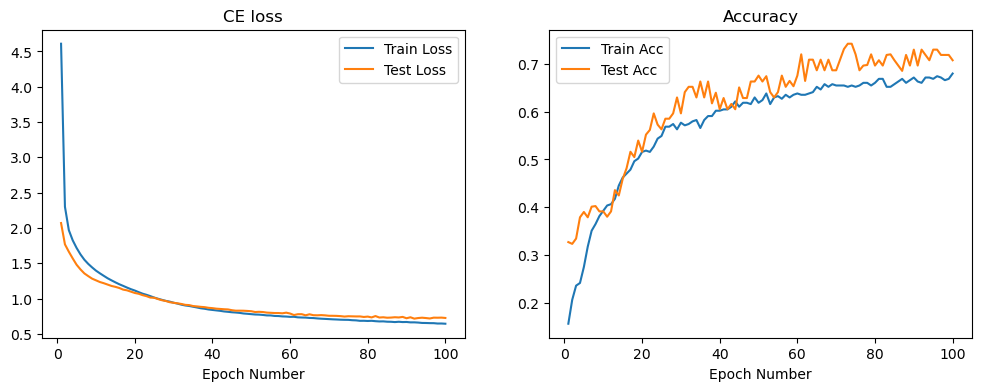

In [15]:
#run the data with the nn model
run_nn(train_dl, test_dl, model_H, CE_loss_H, optimizer_H)

<div dir="rtl">
התקבלה תוצאה טובה ודיוק סט האימון וסט הבדיקה יחסית קרובים כך שלא  ניראה שיש overfit אך ניתן לראות ששלאחר כ 30 potch השיפור מינורי מעוד וניתן לעצור שם. </br>
בנוסף ניתן לראות השיפור ב loss גם הוא מינורי לאחר כ- 30 epoch.<br>
סה"כ עבור סט האימון הראש ביצע מעל אומאבר לדריה של 10% דיוק
</div>

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף ט+י
</div>
<div dir="rtl">
כעת נדרש מאיתנו להורית את התכונה 'Y' ולכן תחילה ניתור עותק ל הדאטא ונוריד את עמודת ה 'Y' ונדפיס בכדי לוודא שהעמודה ירדה.
</div>

In [16]:
#deleting the 'Y' feature from the dataset
dataset_noY = dataset.copy()
dataset_noY.drop(columns=['Y'], inplace=True)
print(dataset_noY)

     AGE  SEX   BMI     BP   S1     S2    S3   S4      S5   S6 class
0     44    1  25.4   95.0  162   92.6  53.0  3.0  4.4067   83     1
1     49    1  25.6   76.0  161   99.8  51.0  3.0  3.9318   78     1
2     41    1  20.5   80.0  124   48.8  64.0  2.0  4.0254   75     1
3     39    2  21.2   90.0  182  110.4  60.0  3.0  4.0604   98     1
4     60    1  25.6   78.0  195   95.4  91.0  2.0  3.7612   87     1
..   ...  ...   ...    ...  ...    ...   ...  ...     ...  ...   ...
437   54    2  36.1  115.0  163   98.4  43.0  4.0  4.6821  101    10
438   65    2  33.5  102.0  190  126.2  35.0  5.0  4.9698  102    10
439   58    2  36.7  117.0  166   93.8  44.0  4.0  4.9488  109    10
440   58    2  38.0  103.0  150  107.2  22.0  7.0  4.6444   98    10
441   35    1  41.3   81.0  168  102.8  37.0  5.0  4.9488   94    10

[442 rows x 11 columns]


<div dir="rtl">
ובצורה דומה לסעיף הקודן ולפי בקשת הממ"ן נפצל את הדאטא לסט אימון בגודל 80% וסט בדיקה בגודל 20%
</div>

In [17]:
#split th data to training set 80% of the data and testing set 20% of the data
dataset_train_noY, dataset_test_noY = train_test_split(dataset_noY, test_size = 0.20, random_state = 42, shuffle = True)
train_dl_noY = DataLoader(dataset_train_noY, minibatches = 10)
test_dl_noY = DataLoader(dataset_test_noY, minibatches = 10)

<div dir="rtl">
ובחרתי לבדוק האם אותה הראשת (מלבד שינוי קטן בשכבת הקלט שכן יש עכשיו פחות תכונה אחת) תקבל ביצואים טובים מספיק של לפחות 10% דיוק
</div>

In [18]:
#createing a nn for the data
model_I = nn.Sequential(
            nn.Linear(10,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,11),
            nn.LogSoftmax(dim=1))
#create a loss function
CE_loss_I = nn.NLLLoss()
#create a optimizer
optimizer_I = torch.optim.Adam(model_I.parameters(), lr=0.001)

100%|██████████| 100/100 [00:02<00:00, 36.04it/s]


training loss 1.924, 	 training accuracy 0.266
testing loss 2.106, 	 testing accuracy 0.189


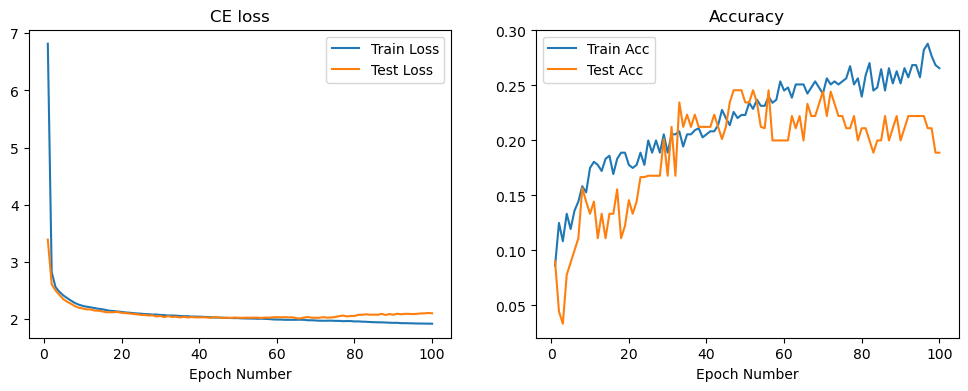

In [19]:
#run the data with the nn model
run_nn(train_dl_noY, test_dl_noY, model_I, CE_loss_I, optimizer_I)

<div dir="rtl">
ניתן לראות שאותו מיבנה רשת הפעם מבצע ביצואים פחות טובים בכ-40% שזה ירידה משמעותית. </br>
ניתן לראות שלאחר כ2~5 epoch פונציית ה loss לא השתפרה בצורה משמעותית. <br>
בנוסף עבור הדיוק ניתן לראות שלאחר כ 30 epoch השיפור בדיוק לא היה ניקר. <br>
</div>

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף יא
</div>
<div dir="rtl">
ההבדל הניקר בדיוק ובביצואי הרשת נובע מיכך שלתכונה 'Y' יש קורולציה גבוהה מעוד עם עמודת 'class' שכן עמודת class נוצרה לפי עירונים של תכונת 'Y' כך שערכי 'Y' נמוכים מסתווגים ל 'class' נמוכים וערכי 'Y' גבוהים מסתווגים לערכי 'class' גבוהים וכו'. </br>
וכך לאר התכונות יש קורולציה נמוכה יותר מאשט לתכונה 'Y' ולכן הדאטא לאחר הורדת העמודה מתקשה להגיע לדיוק גבוהה בהשוואה לדאטא עם התכונה 'Y'
</div>

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף יב
</div>
<div dir="rtl">
 נחלק את הדאטא לאחוזנים לפי הנדרש בממן </br>
 תחילה נמחק את עמודת ה'class' הינה ונייצר עמודהה חדששה המחלקת לאחוזונים <br>
 ונדפיס בכדי לבדוק שהדאטא אכן מחולק היטב
</div>

In [20]:
#change the 'class' feature from 1/10 to 1/100
dataset.drop(columns=['class'], inplace=True)
hundred = 100
hundredth = pd.qcut(dataset['Y'], q=[i / hundred for i in range (hundred+1)],labels=[i+1 for i in range(hundred)])
dataset['class'] = hundredth

In [21]:
print(dataset.to_string())

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y class
0     44    1  25.4   95.00  162   92.6  53.0  3.00  4.4067   83   25     1
1     49    1  25.6   76.00  161   99.8  51.0  3.00  3.9318   78   31     1
2     41    1  20.5   80.00  124   48.8  64.0  2.00  4.0254   75   37     1
3     39    2  21.2   90.00  182  110.4  60.0  3.00  4.0604   98   39     1
4     60    1  25.6   78.00  195   95.4  91.0  2.00  3.7612   87   39     1
5     48    1  22.8  101.00  110   41.6  56.0  2.00  4.1271   97   40     2
6     34    2  22.6   75.00  166   91.8  60.0  3.00  4.2627  108   42     2
7     46    2  23.5   87.00  181  114.8  44.0  4.00  4.7095   98   42     2
8     43    1  21.3   79.00  141   78.8  53.0  3.00  3.8286   90   42     2
9     25    2  23.5   88.00  143   80.8  55.0  3.00  3.5835   83   43     3
10    51    2  26.2  101.00  161   99.6  48.0  3.00  4.2047   88   44     3
11    34    2  20.6   98.00  183   92.0  83.0  2.00  3.6889   92   45     3
12    55    

<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף יב
</div>
<div dir="rtl">
נתחיל בלפצל את הדאטא לסט אימון וסט בדיקה כך שסט האימון מכיל 80% מהדאטא וסט הבדיקה מכיל 20% מסט הבדיקה. </br>
</div>

In [22]:
#split th data to training set 80% of the data and testing set 20% of the data
dataset_train, dataset_test = train_test_split(dataset, test_size = 0.20, random_state = 42, shuffle = True)
train_dl = DataLoader(dataset_train, minibatches = 10)
test_dl = DataLoader(dataset_test, minibatches = 10)

<div dir="rtl">
    כעט בגלל שמדובר במאיות הייתי צריך רשת יותר גדולה ומורכבת ובסוף בחרתי ברשת הבא : </br>
     מבנה הרשת הוא 11-32-64-64-101 ובין השכבות בחרתי הReLU <br>
     פונקציית הפסד NLLLoss. <br>
     ואופטימייזר Adam בעל קצב למידה של ir=0.001.
</div>

In [23]:
#createing a nn for the data
model_M = nn.Sequential(
            nn.Linear(11,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,101),
            nn.LogSoftmax(dim=1))
#create a loss function
CE_loss_M = nn.NLLLoss()
#create a optimizer
optimizer_M = torch.optim.Adam(model_M.parameters(), lr=0.001)

<div dir="rtl">
    נריץ את הרשת הפעם על 20 epotchs שכן לאחר מספר ניסיונות ניתן להגיע לשיפור בדיוק סט האימון ע"י הגדלת ה-epotchs, אך מתקבל מצב של overfitting לסט האימון ותוצאות סט הבדיקה יורדות
</div>

100%|██████████| 20/20 [00:00<00:00, 20.32it/s]


training loss 2.660, 	 training accuracy 0.174
testing loss 4.533, 	 testing accuracy 0.067


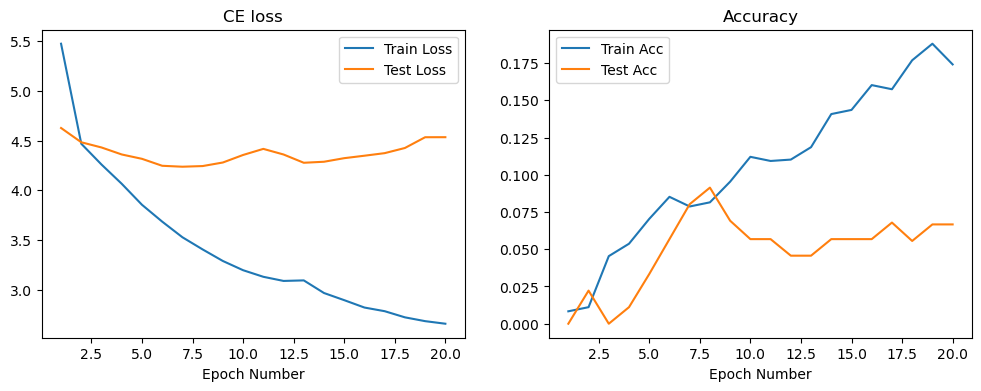

In [24]:
#run the data with the nn model
run_nn(train_dl, test_dl, model_M, CE_loss_M, optimizer_M, epochs = 20)

<div dir="rtl">
    התקבל דיוק קרוב ל 17.4% עבור סט האימון ושל 6.7% לסט הבדיקה.</br>
    ניתן לראות הבדל יחסית גדול בין תוצאות האימון והבדיקה גם הגרף הההפסד וגם בגרף הדיוק. <br>
    <br>
    נמשיך ונוריד את תכונה 'Y' ונאמר את הרשת מחדש
</div>

In [25]:
#deleting the 'Y' feature from the dataset
dataset_noY = dataset.copy()
dataset_noY.drop(columns=['Y'], inplace=True)
print(dataset_noY)

     AGE  SEX   BMI     BP   S1     S2    S3   S4      S5   S6 class
0     44    1  25.4   95.0  162   92.6  53.0  3.0  4.4067   83     1
1     49    1  25.6   76.0  161   99.8  51.0  3.0  3.9318   78     1
2     41    1  20.5   80.0  124   48.8  64.0  2.0  4.0254   75     1
3     39    2  21.2   90.0  182  110.4  60.0  3.0  4.0604   98     1
4     60    1  25.6   78.0  195   95.4  91.0  2.0  3.7612   87     1
..   ...  ...   ...    ...  ...    ...   ...  ...     ...  ...   ...
437   54    2  36.1  115.0  163   98.4  43.0  4.0  4.6821  101   100
438   65    2  33.5  102.0  190  126.2  35.0  5.0  4.9698  102   100
439   58    2  36.7  117.0  166   93.8  44.0  4.0  4.9488  109   100
440   58    2  38.0  103.0  150  107.2  22.0  7.0  4.6444   98   100
441   35    1  41.3   81.0  168  102.8  37.0  5.0  4.9488   94   100

[442 rows x 11 columns]


<div dir="rtl">
נטעין את הנתונים לסט אימון והבדיקה ל 80% ו-20% בתאמה
</div>

In [26]:
#split th data to training set 80% of the data and testing set 20% of the data
dataset_train_noY, dataset_test_noY = train_test_split(dataset_noY, test_size = 0.20, random_state = 42, shuffle = True)
train_dl_noY = DataLoader(dataset_train_noY, minibatches = 10)
test_dl_noY = DataLoader(dataset_test_noY, minibatches = 10)

<div dir="rtl">
ניצור רשת קצת יותר גדולה הפעם שכן אותה הרשת לא הגיע לביצועים מספיק טובים. </br>
השכבות כעט הם 10-64-124-124-101 ובין השכבות עשתמשתי ב ReLU. <br>
פונקציית ההפסד והאופטימייזר ניששארו אותו הדבר
</div>

In [27]:
#createing a nn for the data
model_N = nn.Sequential(
            nn.Linear(10,64),
            nn.ReLU(),
            nn.Linear(64,124),
            nn.ReLU(),
            nn.Linear(124,124),
            nn.ReLU(),
            nn.Linear(124,101),
            nn.LogSoftmax(dim=1))
#create a loss function
CE_loss_N = nn.NLLLoss()
#create a optimizer
optimizer_N = torch.optim.Adam(model_N.parameters(), lr=0.001)

100%|██████████| 20/20 [00:01<00:00, 14.36it/s]


training loss 3.879, 	 training accuracy 0.037
testing loss 5.694, 	 testing accuracy 0.022


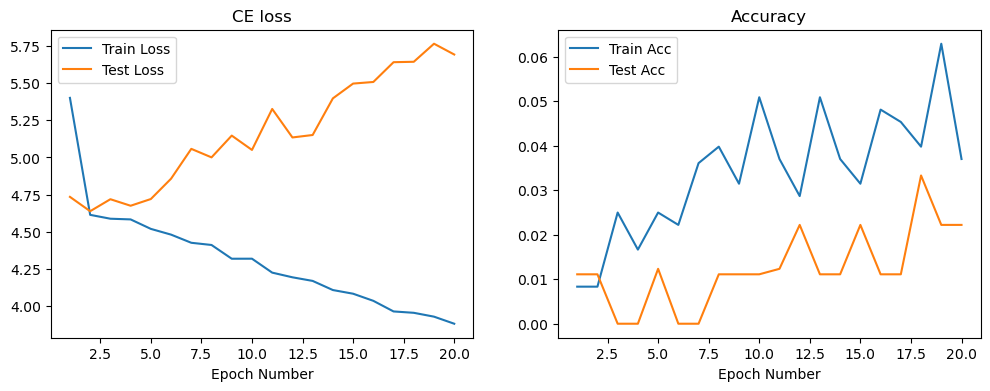

In [28]:
#run the data with the nn model
run_nn(train_dl_noY, test_dl_noY, model_N, CE_loss_N, optimizer_N, epochs = 20)

<div dir="rtl">
ניתן לראות שהרשת התקשתה והגיע ל 3.7% דיוק לאחר 20 epotchs. </br>
ניתן לראות שפונקצית ההפסד של סט הבדיקה הולך וניהיה פחות טוב ופער בין הדיוק של סט האימון וסט הבדיקה הולך וגדל. <br>
</div>
<div dir="rtl" style="font-weight: bold; font-size: 24px;">
סעיף יד
</div>
<div dir="rtl">
המשתנה Y שלפיו יצארנו את העמודה class באחוזונים ועשירונים במיקרה של הדאטא שלנו מדבר על התפתחות מחלה בשנה אחת לאחר ההתחלה. </br>
ולכן כאשר דאטא מתקשר למחלות צריך להיות יותר רגיש מעוד לתוצאה שכן תוצאה גבוהה עלולה לשנות את אופן התיפול במחלה.<br>
לא הצלחתי למצאו מידע בטיפול המחלה אבל בהנחה שהטיפול לא משנה באופן משמעותי (כלומר לא צריך כמות גדולה יותר מהתרופה בכדי לתפל במחל לפי השוני ב Y) כדי להשתמש בעששירונים. <br>
אחרת אם המחלה רגישה יותר לטיפול ולכמות התרופה כדי לשתמש באחוזונים שכן המינון שעשירונים עלול לסווג אליו עלול להזיק למטופל.
</div>